<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/Decisiontree_email_classification_dataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#import ace_tools as ace
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [7]:
df  = pd.read_csv('/content/drive/My Drive/decisiontree/emails.csv')

Dataset shape: (5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Target class counts:
target
0    

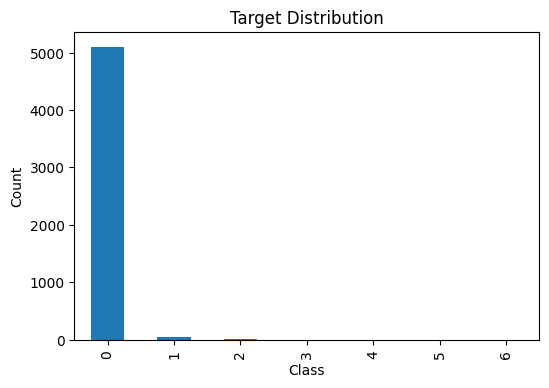


Top 10 features by |corr| with target:
 |             |        0 |
|:------------|---------:|
| speculative | 0.705719 |
| shares      | 0.585023 |
| share       | 0.578481 |
| readers     | 0.543281 |
| investment  | 0.539503 |
| statements  | 0.507389 |
| statement   | 0.502808 |
| predictions | 0.500474 |
| foresee     | 0.495945 |
| technology  | 0.493457 |


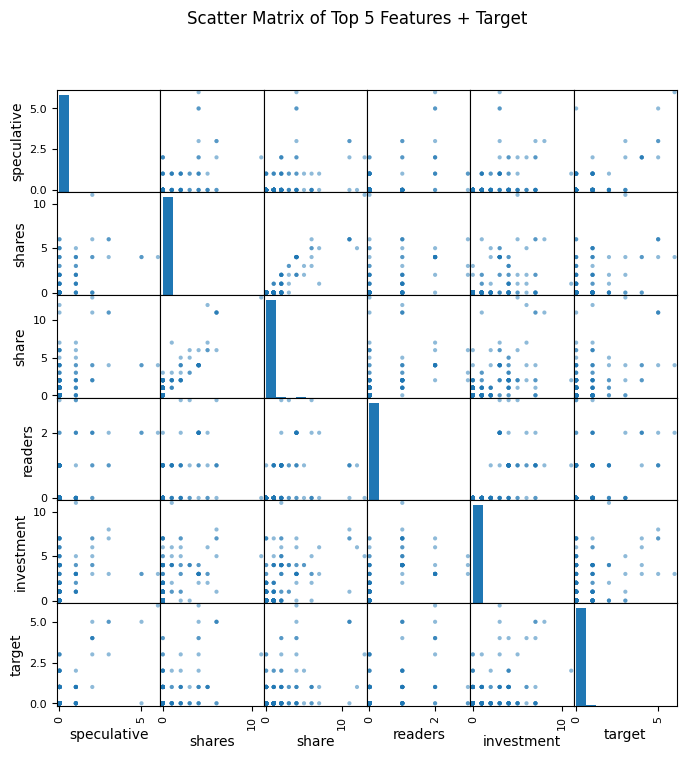


Baseline Accuracy: 0.9858247422680413

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1530
           1       0.42      0.33      0.37        15
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3

    accuracy                           0.99      1552
   macro avg       0.28      0.27      0.27      1552
weighted avg       0.98      0.99      0.98      1552


Confusion Matrix:
 [[1525    4    1    0    0]
 [   7    5    2    1    0]
 [   1    1    0    0    1]
 [   0    0    1    0    0]
 [   1    2    0    0    0]]

Top 10 Feature Importances:
 |                      |         0 |
|:---------------------|----------:|
| investment           | 0.340429  |
| get                  | 0.175701  |
| i                    | 0.0780358 |
| consumers            | 0.0367499 |
| licensed             | 0.0343944

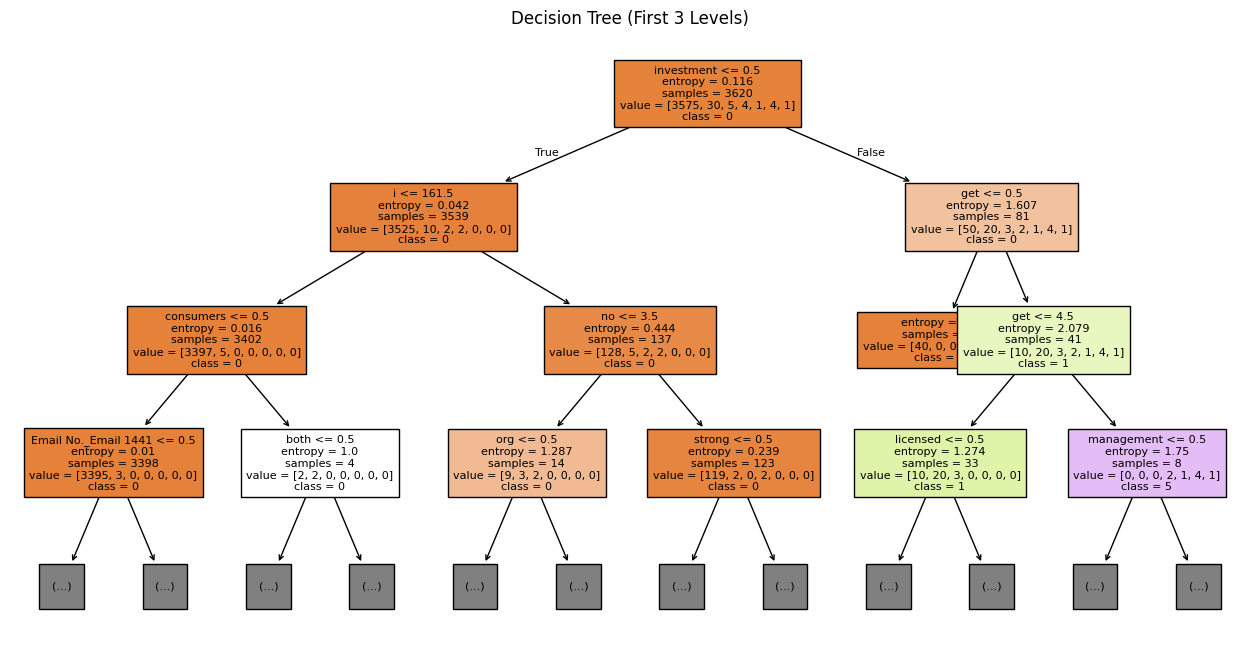


Best Params: {'max_depth': 5, 'min_samples_leaf': 10}
Best CV Score: 0.9886740331491712

Tuned Accuracy: 0.9884020618556701

Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1530
           1       1.00      0.33      0.50        15
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         0

    accuracy                           0.99      1552
   macro avg       0.33      0.22      0.25      1552
weighted avg       0.99      0.99      0.99      1552


Tuned Confusion Matrix:
 [[1529    0    0    0    0    1]
 [  10    5    0    0    0    0]
 [   2    0    0    0    0    1]
 [   0    0    0    0    0    1]
 [   0    0    0    0    0    3]
 [   0    0    0    0    0    0]]


In [9]:


# 1. Load the CSV
#df = pd.read_csv('/mnt/data/emails (1).csv', engine='python', low_memory=True)
print(f"Dataset shape: {df.shape}")
print(df.head())

# 2. Basic target distribution
print("\nTarget class counts:")
print(df['target'].value_counts())

plt.figure(figsize=(6,4))
df['target'].value_counts().plot.bar()
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 3. Top features correlated with target
numeric = df.select_dtypes(include=[np.number]).drop(columns=['target'], errors='ignore')
corr_with_target = numeric.corrwith(df['target']).abs().sort_values(ascending=False)
top10 = corr_with_target.head(10)
print("\nTop 10 features by |corr| with target:\n", top10.to_markdown())

# 4. Scatter‑matrix of the top 5
top5 = top10.index[:5].tolist() + ['target']
scatter_matrix(df[top5], figsize=(8,8))
plt.suptitle('Scatter Matrix of Top 5 Features + Target')
plt.show()

# 5. Preprocessing & train/test split
# 5. Preprocessing & train/test split
X = df.drop('target', axis=1)
# Only fill NaN values in numeric columns
numeric_features = X.select_dtypes(include=[np.number])
X[numeric_features.columns] = numeric_features.fillna(numeric_features.median())
X = pd.get_dummies(X)  # in case there are any categoricals
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6. Train Decision Tree (entropy)
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# 7. Evaluate baseline model
y_pred = clf.predict(X_test)
print("\nBaseline Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 8. Feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
top_imp = importances.sort_values(ascending=False).head(10)
print("\nTop 10 Feature Importances:\n", top_imp.to_markdown())

# 9. Visualize the first 3 levels of the tree
plt.figure(figsize=(16,8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=[str(c) for c in clf.classes_],
    max_depth=3,
    filled=True,
    fontsize=8
)
plt.title('Decision Tree (First 3 Levels)')
plt.show()

# 10. Hyperparameter tuning via GridSearch
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid = GridSearchCV(
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    param_grid, cv=5, n_jobs=-1
)
grid.fit(X_train, y_train)
print("\nBest Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

# 11. Evaluate tuned model
y_tuned = grid.predict(X_test)
print("\nTuned Accuracy:", accuracy_score(y_test, y_tuned))
print("\nTuned Classification Report:\n", classification_report(y_test, y_tuned))
print("\nTuned Confusion Matrix:\n", confusion_matrix(y_test, y_tuned))
